Saving emisi.csv to emisi (12).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 642 entries, 0 to 641
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Ville (L/100 km)      642 non-null    float64
 1   Route (L/100 km)      642 non-null    float64
 2   kombinasi (L/100 km)  642 non-null    float64
 3   Emisi CO2 (g/km)      642 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 20.2 KB


,Ville (L/100 km),Route (L/100 km),kombinasi (L/100 km),Emisi CO2 (g/km)
0,8.1,6.5,7.4,172
1,8.9,6.5,7.8,181
2,11.1,8.3,9.9,230
3,12.6,9.4,11.2,263
4,13.8,11.2,12.4,291


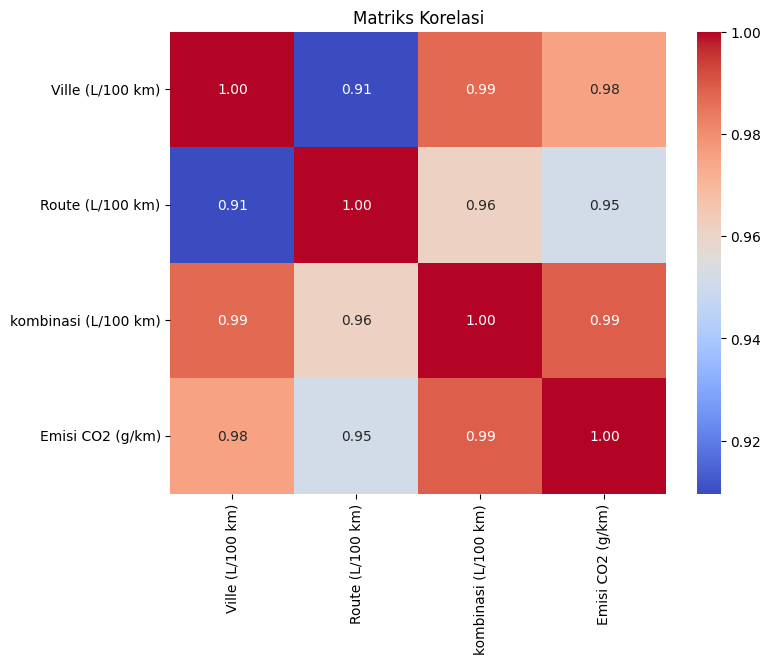

{'Model': 'Linear Regression', 'MAE': 2.6490899015492753, 'MSE': 35.59331113263792, 'RMSE': 5.966013001380229, 'R2 Score': 0.9918141014321566}


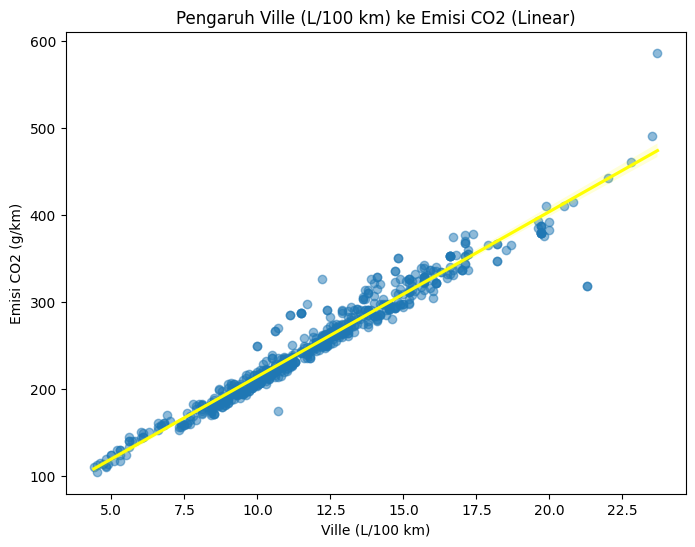

{'Model': 'Polynomial Regression (Degree 2)', 'MAE': 2.718861109265443, 'MSE': 35.104241018048455, 'RMSE': 5.9248832071230275, 'R2 Score': 0.991926579822708}


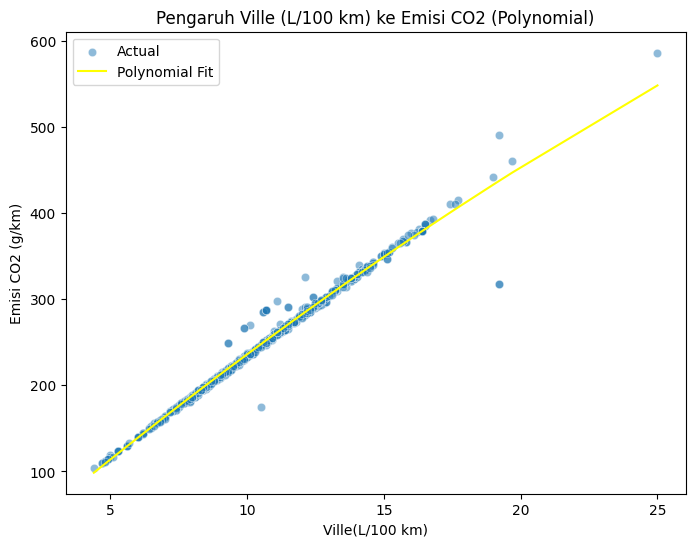

In [14]:
# 1. Import Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 2. Import Data dan Membaca file CSV
from google.colab import files
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

# informasi dasar data
df.info()
display(df.head())

# Matriks Korelasi
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriks Korelasi")
plt.show()

# Membuat Model Regresi Sederhana
X = df[["kombinasi (L/100 km)"]]
y = df["Emisi CO2 (g/km)"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

# Evaluasi model regresi linear sederhana
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return {"Model": model_name, "MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r2}

result_lr = evaluate_model(y_test, y_pred_lr, "Linear Regression")
print(result_lr)

# Pengaruh Ville (L/100 km) ke Emisi CO2
plt.figure(figsize=(8, 6))
sns.regplot(x=df["Ville (L/100 km)"], y=df["Emisi CO2 (g/km)"], scatter_kws={"alpha": 0.5}, line_kws={"color": "yellow"})
plt.xlabel("Ville (L/100 km)")
plt.ylabel("Emisi CO2 (g/km)")
plt.title("Pengaruh Ville (L/100 km) ke Emisi CO2 (Linear)")
plt.show()


# Membuat Model Regresi Polynomial
degree = 2
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)
y_pred_poly = model_poly.predict(X_test_poly)

# Evaluasi model regresi polynomial
result_poly = evaluate_model(y_test, y_pred_poly, f"Polynomial Regression (Degree {degree})")
print(result_poly)

# Visualisasi Polynomial Regression
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X["kombinasi (L/100 km)"], y=y, alpha=0.5, label="Actual")
sns.lineplot(x=X["kombinasi (L/100 km)"].values.flatten(), y=model_poly.predict(poly.fit_transform(X)).flatten(), color='yellow', label="Polynomial Fit")
plt.xlabel("Ville(L/100 km)")
plt.ylabel("Emisi CO2 (g/km)")
plt.title("Pengaruh Ville (L/100 km) ke Emisi CO2 (Polynomial)")
plt.legend()
plt.show()


1.Import Library: Kode ini mengimpor berbagai pustaka yang diperlukan untuk analisis data, visualisasi, dan pembelajaran mesin, termasuk pandas, numpy, seaborn, matplotlib, dan beberapa modul dari sklearn.

2. Import Data dan Membaca file CSV: Menggunakan files.upload() dari Google Colab untuk mengunggah file CSV, kemudian membaca data tersebut ke dalam DataFrame df menggunakan pd.read_csv().

3. Informasi Dasar Data: Menampilkan informasi dasar tentang DataFrame, seperti tipe data dan jumlah nilai non-null, serta menampilkan beberapa baris pertama dari data.

4. Matriks Korelasi: Menghitung dan memvisualisasikan matriks korelasi dari DataFrame dengan sns.heatmap(), untuk melihat hubungan antara variabel-variabel dalam data.

5. Membuat Model Regresi Sederhana: Memisahkan data menjadi fitur X dan target y, lalu membagi data menjadi set pelatihan dan pengujian menggunakan train_test_split(). Model regresi linear diinisialisasi dan dilatih menggunakan set pelatihan.

6. Evaluasi Model Regresi Linear Sederhana: Fungsi evaluate_model() digunakan untuk menghitung metrik evaluasi (MAE, MSE, RMSE, R2 Score) untuk model regresi linear yang telah dilatih, dan hasilnya dicetak.

7. Pengaruh Ville (L/100 km) ke Emisi CO2: Menggunakan sns.regplot() untuk memvisualisasikan hubungan antara Ville (L/100 km) dan Emisi CO2 (g/km) dengan garis regresi linear yang ditampilkan.

8. Membuat Model Regresi Polynomial: Menggunakan PolynomialFeatures untuk membuat fitur polinomial dari data, kemudian membagi data lagi menjadi set pelatihan dan pengujian sebelum melatih model regresi linear dengan fitur polinomial.

9. Evaluasi Model Regresi Polynomial: Menghitung metrik evaluasi untuk model regresi polynomial yang telah dilatih, hasilnya dicetak menggunakan fungsi evaluate_model().

10. Visualisasi Polynomial Regression: Memvisualisasikan data aktual dan garis regresi polinomial menggunakan sns.scatterplot() dan sns.lineplot() untuk menunjukkan pengaruh Ville (L/100 km) terhadap Emisi CO2 (g/km) dengan regresi polinomial.